<a href="https://colab.research.google.com/github/antonioIannotta/data-analytics-project/blob/test/MovieLens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pickle as pk

In [3]:
mean_rating = pd.read_csv('../csv_genereted/mean_rating.csv')
movies_genre = pd.read_csv('../csv_genereted/movies_genre.csv')
tag_relevance_movies = pd.read_csv('../csv_genereted/movies_tag_relevance.csv')

<AxesSubplot: xlabel='rating', ylabel='Count'>

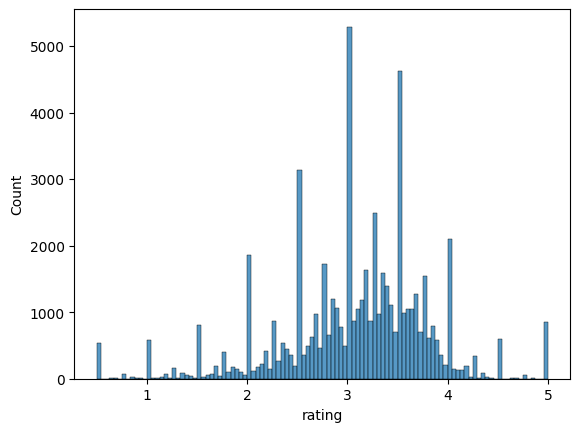

In [4]:
sns.histplot(mean_rating['rating'])

In [5]:
movie_rating = pd.merge(movies_genre, mean_rating, on = 'movieId')

C:\Users\Admin\AppData\Local\Temp\ipykernel_24692\2076971394.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = movie_rating.corr()


<AxesSubplot: >

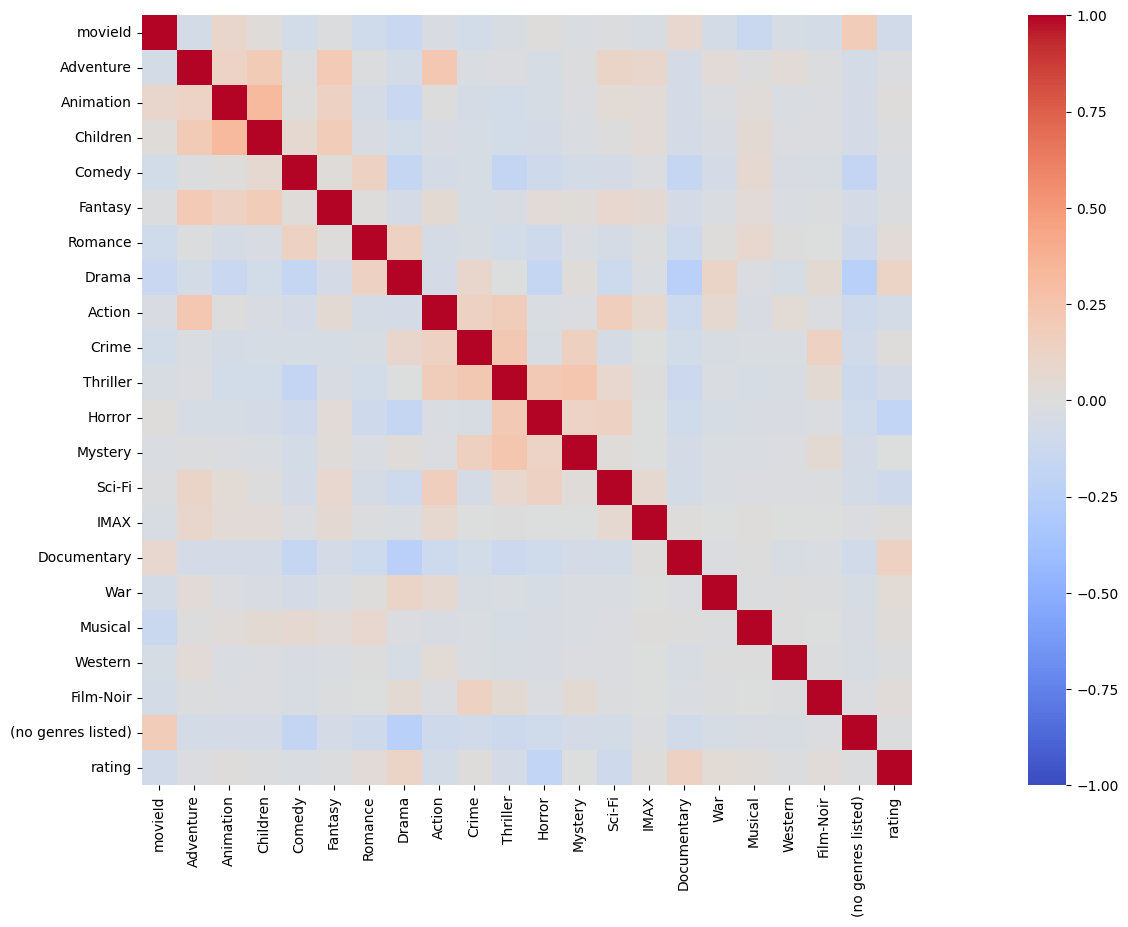

In [6]:
corr = movie_rating.corr()
fig, ax = plt.subplots(figsize = (30,10))
sns.heatmap(corr, vmin=-1, vmax=1, cmap = 'coolwarm', square=True)

In [7]:
tag_rating = pd.merge(tag_relevance_movies, mean_rating, on = 'movieId')

<AxesSubplot: >

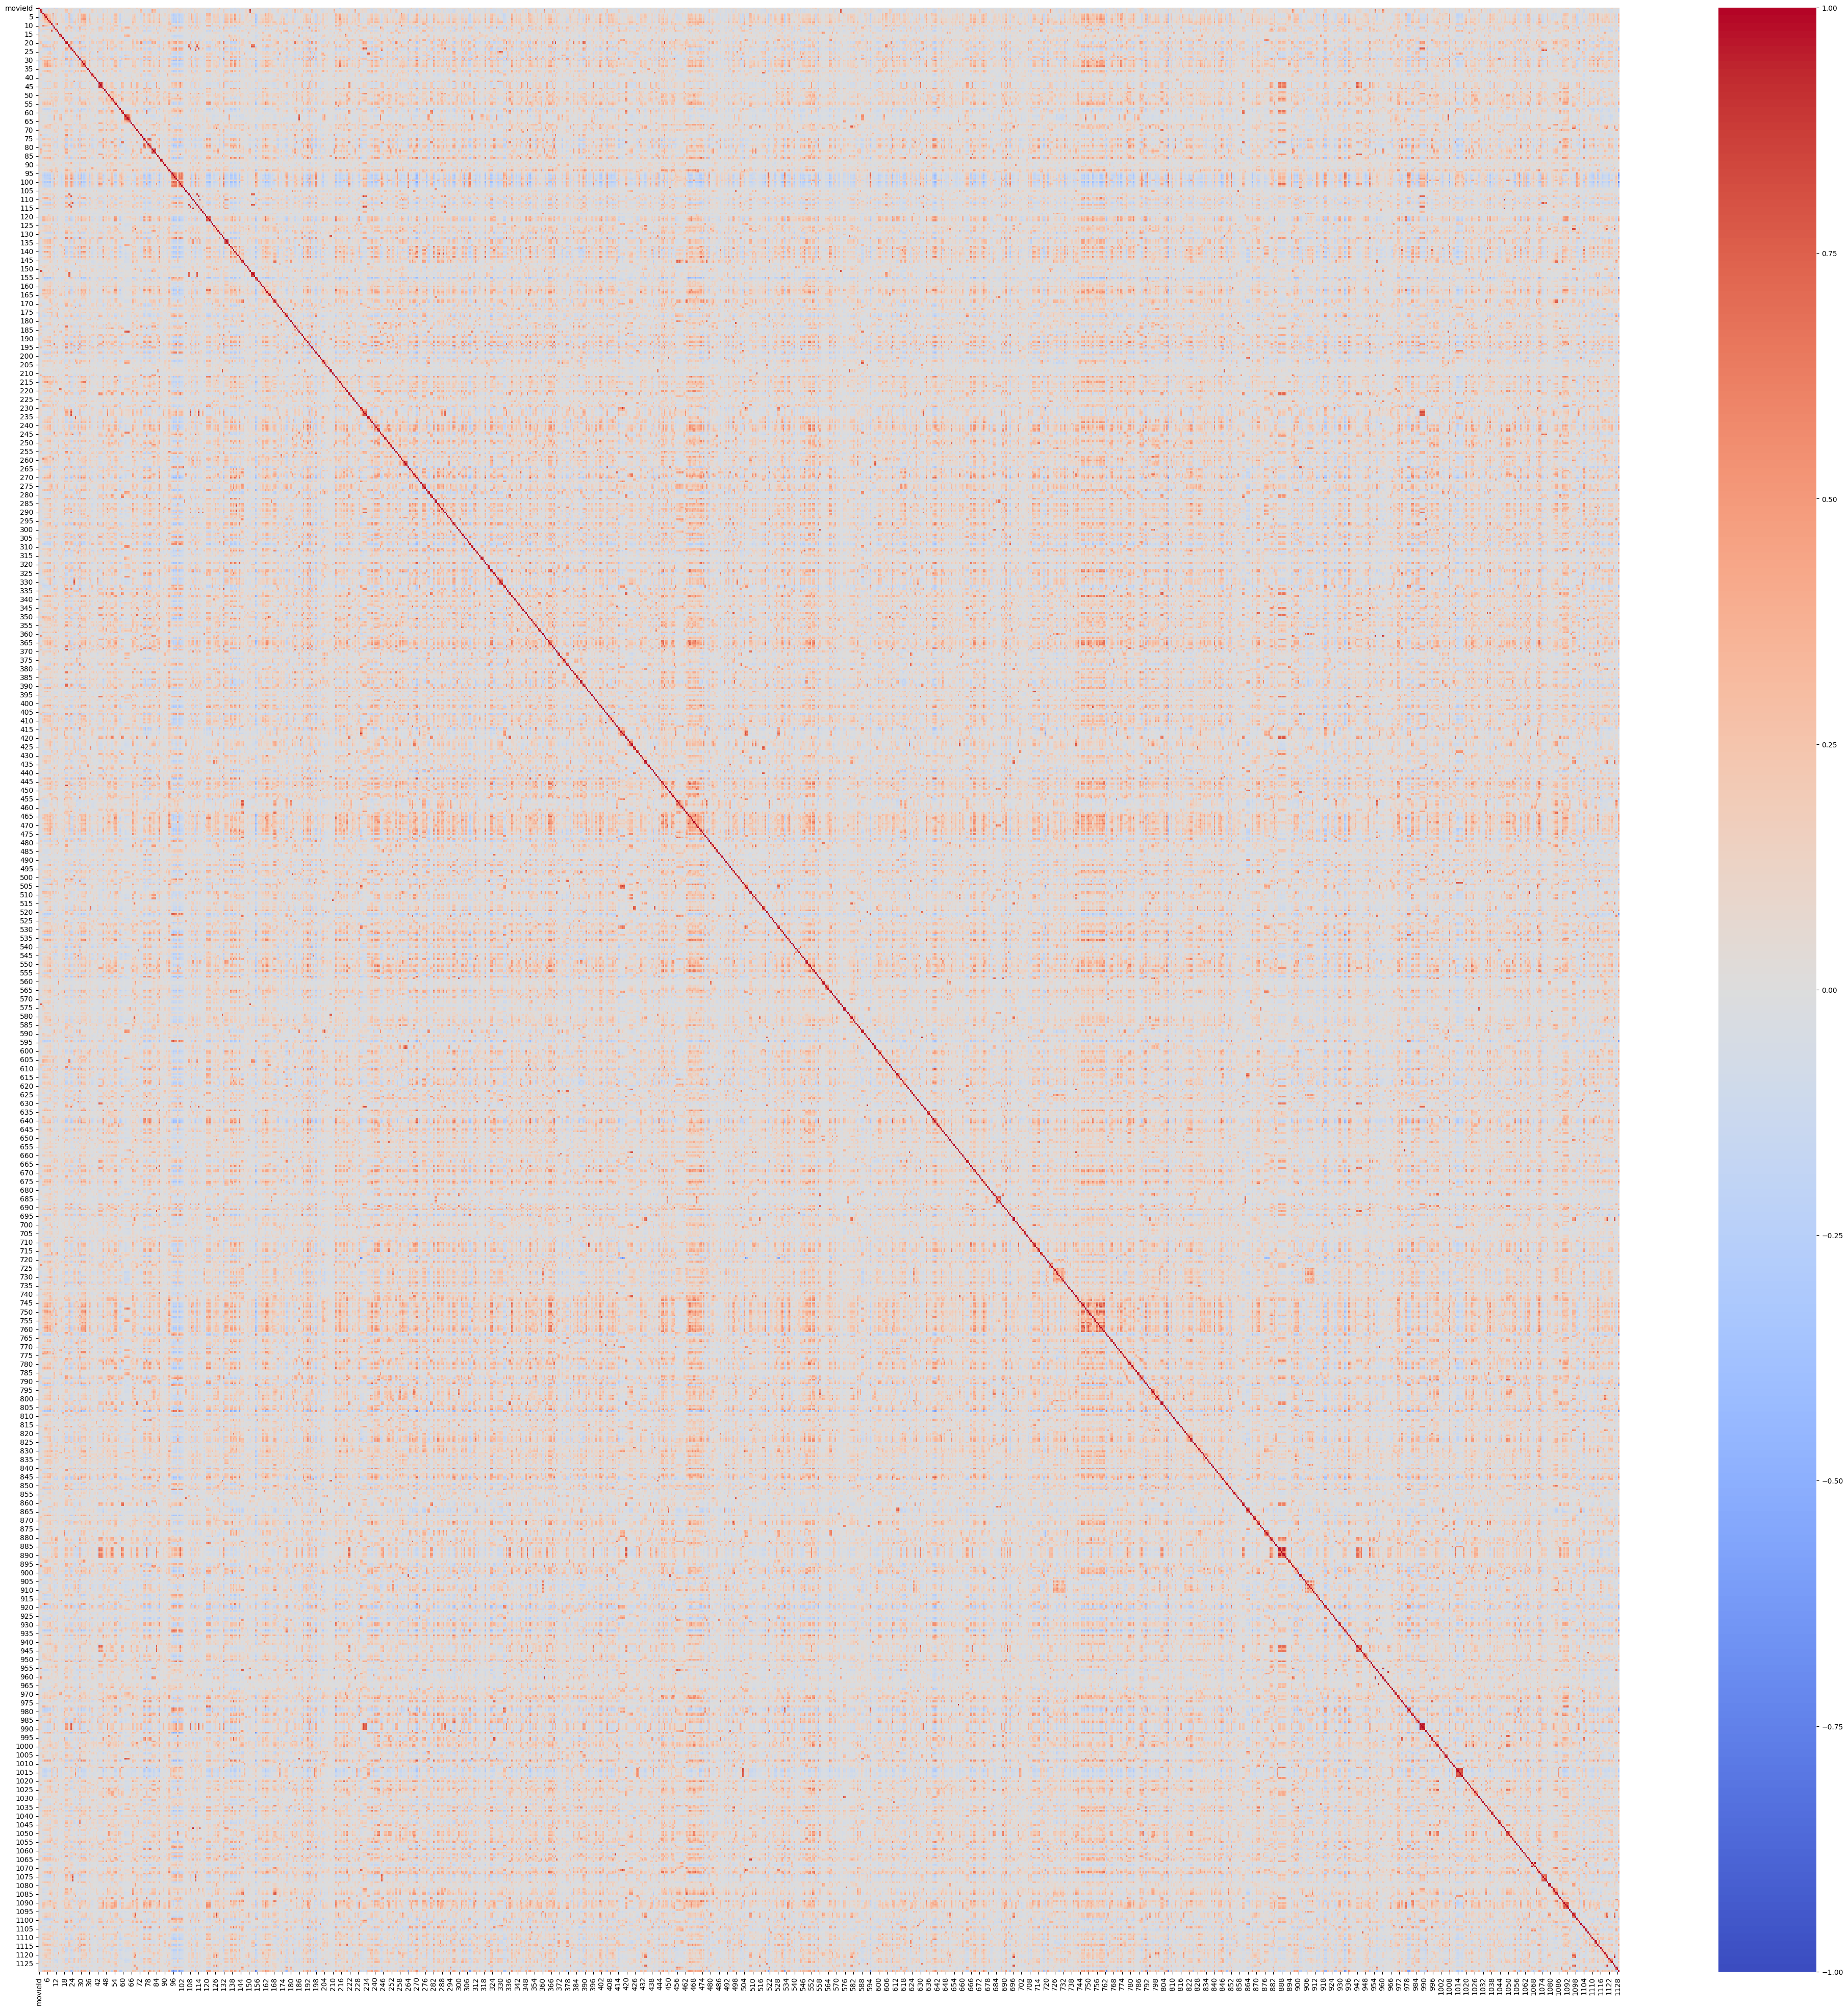

In [8]:
corr2 = tag_rating.corr()
fig, ax = plt.subplots(figsize = (50,50))
sns.heatmap(corr2, vmin=-1, vmax=1, cmap = 'coolwarm')

In [9]:
movies_tag = pd.merge(movies_genre, tag_relevance_movies, on = 'movieId')

In [10]:
final_dataframe = pd.merge(movies_tag, mean_rating, on = 'movieId')

In [11]:
final_dataframe = final_dataframe.drop(columns='movieId')

In [12]:
X = final_dataframe.iloc[:, 1:1149]
X.columns = X.columns.astype('str')
y = final_dataframe.iloc[:, 1149]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [15]:
pca = PCA(n_components=0.70)
X_train_t = pca.fit_transform(X_train)
X_test_t = pca.transform(X_test)

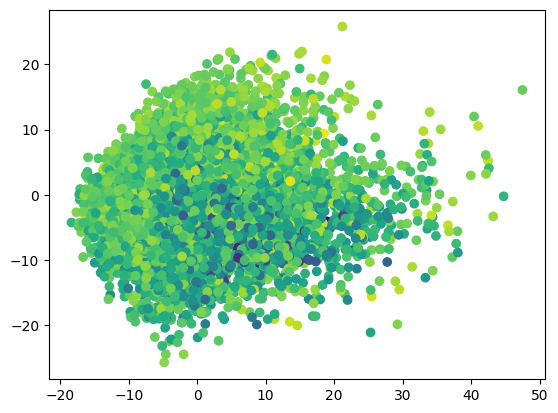

In [16]:
plt.scatter(X_train_t[:,1],X_train_t[:,2],c=y_train)

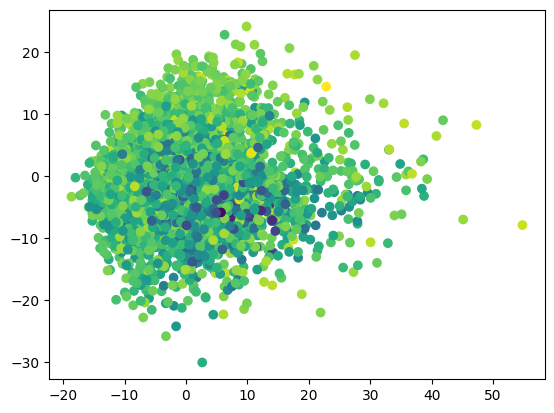

In [17]:
plt.scatter(X_test_t[:,1],X_test_t[:,2],c=y_test)

In [18]:
print(X_train.shape)
print(X_train_t.shape)

(9256, 1148)
(9256, 120)


In [19]:
X_train_t

array([[ -7.73787206,  -4.70544945,   0.62785636, ...,  -0.2154398 ,
          1.30228338,   1.36434782],
       [-14.56041755,  16.5925395 ,  -7.57583807, ...,  -0.82855409,
         -0.78784437,  -0.78942835],
       [-14.27059533,   3.17857104,  -0.93546762, ...,   0.93793263,
          1.05173024,   1.24109125],
       ...,
       [ -5.92941319,  14.0963728 ,  -0.61686044, ...,  -0.57903925,
         -1.99593055,   0.77774116],
       [ 17.32601374,  -0.30153181,   3.66158073, ...,   0.70354681,
          0.27198453,  -1.40580633],
       [  0.63773092,  -2.11504368,  -6.49823637, ...,   0.60917571,
         -1.20474946,   1.35363777]])

In [20]:
model_1 = LinearRegression()
params = {'fit_intercept': [True, False], 'copy_X': [True, False]}
grid = GridSearchCV(model_1, params, cv=5, n_jobs=1)
grid.fit(X_train_t, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]})

In [21]:
best_params_reg = grid.best_params_
best_params_reg

{'copy_X': True, 'fit_intercept': True}

In [22]:
linear_regression = LinearRegression()
linear_regression.fit(X_train_t, y_train)

pred = linear_regression.predict(X_test_t)

print("Mse: ", mean_squared_error(y_test, pred))
print("R^2: ", r2_score(y_test, pred))

Mse:  0.010761137943908709
R^2:  0.9532977931468383


In [23]:
model_2 = KNeighborsRegressor()
params = {'n_neighbors': [5,10,15,20,15,30], 'metric': ['manhattan', 'minkowski'], 'algorithm': ['ball_tree', 'kd_tree', 'brute']}
knn_grid = GridSearchCV(model_2, params, cv=5, n_jobs=1)
knn_grid.fit(X_train_t, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'metric': ['manhattan', 'minkowski'],
                         'n_neighbors': [5, 10, 15, 20, 15, 30]})

In [24]:
best_params_knn = knn_grid.best_params_
best_params_knn

{'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 10}

In [25]:
knn_regression = KNeighborsRegressor(n_neighbors=best_params_knn['n_neighbors'], metric=best_params_knn['metric'], algorithm=best_params_knn['algorithm'])
knn_regression.fit(X_train_t, y_train)
knn_pred = knn_regression.predict(X_test_t)

print("Mse: ", mean_squared_error(y_test, knn_pred))
print("R^2: ", r2_score(y_test, knn_pred))

Mse:  0.04313929340398458
R^2:  0.8127800038849485


In [26]:
model_3 = RandomForestRegressor()
params = { 'n_estimators': [200,300,400,500], 'max_features': ['sqrt','log2'], 'max_depth' : [3,4,5,6,7], 'random_state' : [18]}
forest_grid = GridSearchCV(model_3, params, cv= 5)
forest_grid.fit(X_train_t, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500],
                         'random_state': [18]})

In [27]:
best_params_forest = forest_grid.best_params_
best_params_forest

{'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 500,
 'random_state': 18}

In [28]:
random_forest_regression = RandomForestRegressor(n_estimators=best_params_forest['n_estimators'] , max_features=best_params_forest['max_features'] , max_depth=best_params_forest['max_depth'] , random_state=best_params_forest['random_state'] )
random_forest_regression.fit(X_train_t, y_train)
forest_pred = random_forest_regression.predict(X_test_t)

print("Mse: ", mean_squared_error(y_test, forest_pred))
print("R^2: ", r2_score(y_test, forest_pred))

Mse:  0.08046306577307188
R^2:  0.6507987574027296


In [29]:
# save the models
with open('./nd_supervised_models/linear_regression.pkl','wb') as f:
    pk.dump(linear_regression,f)
    
with open('./nd_supervised_models/knn_regression.pkl','wb') as f:
    pk.dump(knn_regression,f)

with open('./nd_supervised_models/random_forest_regression.pkl','wb') as f:
    pk.dump(random_forest_regression,f)

In [ ]:
# load the models
with open('./nd_supervised_models/linear_regression.pkl', 'rb') as f:
    regr_load = pk.load(f)
    
with open('./nd_supervised_models/knn_regression.pkl', 'rb') as f:
    knn_load = pk.load(f)
    
with open('./nd_supervised_models/random_forest_regression.pkl', 'rb') as f:
    forest_load = pk.load(f)

In [9]:
X_demo = [np.random.uniform(-20,20,120)]

In [10]:
y_reg = regr_load.predict(X_demo)
y_reg

array([3.50886999])

In [11]:
y_knn = knn_load.predict(X_demo)
y_knn

array([3.30091919])

In [12]:
y_forest = forest_load.predict(X_demo)
y_forest

array([3.22000186])